In [ ]:
import pandas as pd
import seaborn as sb
import seaborn.objects as so
import utils as utils
%reload_ext autoreload
%autoreload 2



In [ ]:
df=utils.get_df('./zillowData/State_time_series.csv')
sb.histplot(df, x='HomesSoldAsForeclosuresRatio_AllHomes')
p=so.Plot(df, x="HomesSoldAsForeclosuresRatio_AllHomes")
years=[x[:-6] for x in df['Date'].values.tolist()]
p.add(so.Area(), so.KDE(), color=years)

In [ ]:
df=utils.get_df('./zillowData/County_time_series.csv')
#print(df.columns)
#sb.histplot(df, x='HomesSoldAsForeclosuresRatio_AllHomes')
p=so.Plot(df, x=df['Date'].values, y="MedianSoldPrice_AllHomes")
years=[x[:-6] for x in df['Date'].values.tolist()]
#print(years)
p.add(so.Area(), so.KDE(), color=years)
#p.add(so.Bars(), so.KDE(), color=years)

In [ ]:
import plotly.express as px
df = utils.get_df('./zillowData/County_time_series.csv')

fig = px.scatter(df, x="gdpPercap", y="lifeExp",
	         size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

/workspaces/Real-Estate-project/utils.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(name)


<Axes: xlabel='MedianListingPricePerSqft_1Bedroom', ylabel='Density'>

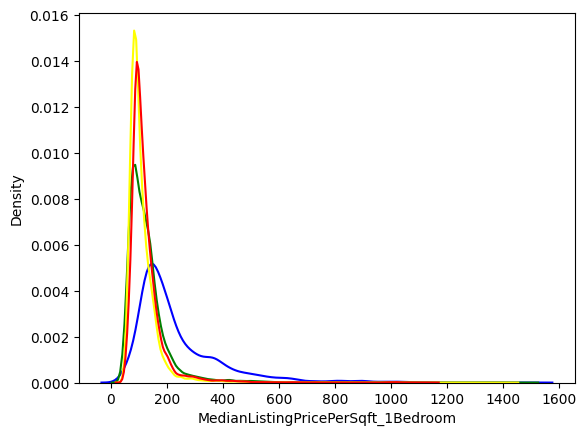

In [9]:
df=utils.get_df('./zillowData/County_time_series.csv')
sb.kdeplot(df.query("MedianListingPricePerSqft_1Bedroom<=1500"), x='MedianListingPricePerSqft_1Bedroom', color='blue')
sb.kdeplot(df.query("MedianListingPricePerSqft_2Bedroom<=1500"), x='MedianListingPricePerSqft_2Bedroom', color='green')
sb.kdeplot(df.query("MedianListingPricePerSqft_3Bedroom<=1500"), x='MedianListingPricePerSqft_3Bedroom', color='yellow')
sb.kdeplot(df.query("MedianListingPricePerSqft_4Bedroom<=1500"), x='MedianListingPricePerSqft_4Bedroom', color='red')